**Bibliotecas y Dependencias**

In [ ]:
import tensorflow as tf #Neuronal network

from keras.datasets import mnist #MNIST Data Set (Hand writing digits)
import numpy as np #Array manipulation
import matplotlib.pyplot as plt #Showing data

**Data Set**

In [ ]:

#loading data set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#stats
print("Training\n X = {}, Y = {}".format(X_train.shape, Y_train.shape))
print("Testing\n X = {}, Y = {}".format(X_test.shape, Y_test.shape))
print("Tipo de dato: {}".format(X_train.dtype))


Training
 X = (60000, 28, 28), Y = (60000,)
Testing
 X = (10000, 28, 28), Y = (10000,)
Tipo de dato: uint8


**Vizualización de los datos**

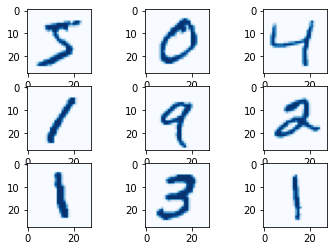

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('Blues'))
plt.show()

**Normalización**

In [ ]:
#255 max value
print(X_train[0])
X_train = X_train.astype("float32")
X_train = X_train / 255.0

X_test = X_test.astype("float32")
X_test = X_test / 255.0

print(X_train[0])

**Arquitectura Red Neuronal**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
#compilation
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9576 - accuracy: 0.7488 - val_loss: 0.2972 - val_accuracy: 0.9184
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2904 - accuracy: 0.9171 - val_loss: 0.2414 - val_accuracy: 0.9308
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2292 - accuracy: 0.9347 - val_loss: 0.1978 - val_accuracy: 0.9437
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1927 - accuracy: 0.9463 - val_loss: 0.1707 - val_accuracy: 0.9498
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1655 - accuracy: 0.9532 - val_loss: 0.1540 - val_accuracy: 0.9559
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1412 - accuracy: 0.9601 - val_loss: 0.1412 - val_accuracy: 0.9581
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1301 - accuracy: 0.9644 - val_loss: 0.1253 - val_accuracy:

**Evaluación**

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9782


[0.06842837482690811, 0.9782000184059143]

In [ ]:
X_new = X_test[:9]
Y_proba = model.predict(X_new)
Y_pred = np.argmax(model.predict(X_new), axis=-1)
print(Y_pred)

[7 2 1 0 4 1 4 9 5]


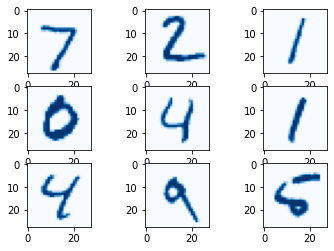

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_new[i], cmap=plt.get_cmap('Blues'))
plt.show()

**Exportar modelo**

In [ ]:
model.save("hand_writing_nn.h5")

In [ ]:
#importar
#from keras.models import load_model
#model = load_model("hand_writing_nn.h5")